# Тестовое задание Topface Media

На новых пользователях в некоторых странах был проведен A/B-тест. Его суть
заключалась в том, что для тестовой группы удвоили стоимость премиум-подписки при
покупке через платежные системы Google Play и Payment Ninja. Стоимость пробной
подписки не менялась.
Премиум подписка дает доступ к некоторым важным заблокированным функциям.
Если приобретает премиум-подписку, то ежемесячно с него списывается
фиксированная сумма денег, если он ее не отменит.
Нам необходимо выяснить, удачен ли эксперимент. Если все же тест не подтвердил
преимущества новых цен, то проанализировать, имеет ли данная правка смысл хоть
на каких-то группах пользователей.

## 1. Предварительный просмотр и изучение данных, предобработка.

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [275]:
pay_df_1 = pd.read_csv('payments_CG1.csv', sep=";")
pay_df_2 = pd.read_csv('payments_CG2.csv', sep=";")
pay_df_test = pd.read_csv('payments_TG.csv', sep=";")
portrait_df_1 = pd.read_csv('portrait_CG1.csv', sep=";")
portrait_df_2 = pd.read_csv('portrait_CG2.csv', sep=";")
portrait_df_test = pd.read_csv('portrait_TG.csv', sep=";")

In [276]:
pay_df_1.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891319275.0,05.11.2017 19:57,12.11.2017 21:57,12727.0,147.0,TrialVipPopup,FR,trial
1,892421826.0,14.10.2017 12:46,23.10.2017 12:54,14586.0,147.0,TrialVipPopup,IL,trial
2,891822480.0,26.10.2017 22:27,12.11.2017 20:59,1911.0,19.0,none,IT,coins
3,891367521.0,05.11.2017 2:37,06.11.2017 19:15,1456.0,127.0,sympathy_access,IT,other
4,892207959.0,18.10.2017 18:30,12.11.2017 12:03,1261.0,19.0,EmptyLikes,FR,coins


In [277]:
pay_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             377 non-null    float64
 1   registration_date   377 non-null    object 
 2   payment_date        377 non-null    object 
 3   revenue             377 non-null    float64
 4   payment_service_id  377 non-null    float64
 5   place               377 non-null    object 
 6   country             377 non-null    object 
 7   product_type        377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB




Во всех столбцах одинаковое количество пропусков, причем их количество значительно превышает количество присутствующих значений. Избавимся от пропусков, после этого изменим тип данных. 



In [278]:
pay_df_1 = pay_df_1.dropna()
pay_df_1['user_id'] = pay_df_1['user_id'].astype('int64')
pay_df_1['revenue'] = pay_df_1['revenue'].astype('int64')
pay_df_1['payment_service_id'] = pay_df_1['payment_service_id'].astype('int64')
pay_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             377 non-null    int64 
 1   registration_date   377 non-null    object
 2   payment_date        377 non-null    object
 3   revenue             377 non-null    int64 
 4   payment_service_id  377 non-null    int64 
 5   place               377 non-null    object
 6   country             377 non-null    object
 7   product_type        377 non-null    object
dtypes: int64(3), object(5)
memory usage: 26.5+ KB


In [279]:
pay_df_2.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891266616,06.11.2017 15:25,10.11.2017 17:35,6305,19,autorefill,AR,coins
1,892186737,19.10.2017 6:03,04.11.2017 8:53,4732,147,promo.key31,CL,prem
2,891959004,24.10.2017 0:12,31.10.2017 2:12,10153,147,TrialVipPopup,US,trial
3,892115478,20.10.2017 20:39,26.10.2017 6:26,2366,67,EmptyLikes,ES,other
4,891592941,31.10.2017 12:40,03.11.2017 16:25,6292,147,promo.key31,CH,prem


In [280]:
pay_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             328 non-null    int64 
 1   registration_date   328 non-null    object
 2   payment_date        328 non-null    object
 3   revenue             328 non-null    int64 
 4   payment_service_id  328 non-null    int64 
 5   place               328 non-null    object
 6   country             328 non-null    object
 7   product_type        328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [281]:
pay_df_test.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891345942,05.11.2017 13:00,13.11.2017 15:04,12909,147,TrialVipPopup,IT,trial
1,892054251,22.10.2017 0:33,30.10.2017 1:37,13923,147,TrialVipPopup,US,trial
2,892236423,18.10.2017 1:09,23.10.2017 0:15,3783,67,Menu,US,other
3,892236423,18.10.2017 1:09,27.10.2017 22:38,3783,67,Menu,US,other
4,892168170,19.10.2017 17:10,27.10.2017 19:10,9087,147,TrialVipPopup,US,trial


In [282]:
pay_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             273 non-null    int64 
 1   registration_date   273 non-null    object
 2   payment_date        273 non-null    object
 3   revenue             273 non-null    int64 
 4   payment_service_id  273 non-null    int64 
 5   place               273 non-null    object
 6   country             273 non-null    object
 7   product_type        273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


Посмотрим, есть ли в данных дубликаты и избавимся от них, если таковые имеются

In [283]:
pay_df_1.duplicated().sum()

21

In [284]:
pay_df_2.duplicated().sum()

5

In [285]:
pay_df_test.duplicated().sum()

7

In [286]:
pay_df_1 = pay_df_1.drop_duplicates().reset_index(drop=True)
pay_df_2 = pay_df_2.drop_duplicates().reset_index(drop=True)
pay_df_test = pay_df_test.drop_duplicates().reset_index(drop=True)

In [287]:
pay_df_1.duplicated().sum()

0

In [288]:
pay_df_2.duplicated().sum()

0

In [289]:
pay_df_test.duplicated().sum()

0

Посчитаем выручку пользователей, у которых есть премиум подписка и узнаем, есть ли разница в выручке между пользователями контрольных групп и тестовой, а так же отношение выручки от премиум подписок ко всем видам выручки.

In [290]:
def data_revenue(df, column='product_type'):
    prem_revenue = df[df[column] == 'prem']['revenue'].sum()
    total_revenue = df['revenue'].sum()
    revenue_relation = prem_revenue / total_revenue
    prem_count = df[df[column] == 'prem'][column].count()
    trial_count = df[df[column] == 'trial'][column].count()
    prem_relation = prem_count / df.shape[0]
    print(f'Количество покупок премиум подписки - {prem_count}')
    print(f'Количество пользователей с пробной подпиской - {trial_count}')
    print(f'Отношение количества покупок премиум подписки ко всем покупкам - {prem_relation:.2%}')
    print(f'Выручка выборки только с покупки премиум подписок - {prem_revenue}')
    print(f'Общая выручка выборки со всех продуктов - {total_revenue}')
    print(f'Отношение выручки премиум подписок к выручке всех продуктов - {revenue_relation:.2%}')

In [291]:
data_revenue(pay_df_1)

Количество покупок премиум подписки - 106
Количество пользователей с пробной подпиской - 67
Отношение количества покупок премиум подписки ко всем покупкам - 29.78%
Выручка выборки только с покупки премиум подписок - 779259
Общая выручка выборки со всех продуктов - 2494804
Отношение выручки премиум подписок к выручке всех продуктов - 31.24%


In [292]:
data_revenue(pay_df_2)

Количество покупок премиум подписки - 107
Количество пользователей с пробной подпиской - 53
Отношение количества покупок премиум подписки ко всем покупкам - 33.13%
Выручка выборки только с покупки премиум подписок - 744809
Общая выручка выборки со всех продуктов - 1907997
Отношение выручки премиум подписок к выручке всех продуктов - 39.04%


In [293]:
data_revenue(pay_df_test)

Количество покупок премиум подписки - 76
Количество пользователей с пробной подпиской - 62
Отношение количества покупок премиум подписки ко всем покупкам - 28.57%
Выручка выборки только с покупки премиум подписок - 810706
Общая выручка выборки со всех продуктов - 2332226
Отношение выручки премиум подписок к выручке всех продуктов - 34.76%


Посмотрим, были ли такие пользователи, которые купили премиум подписку больше одного раза, либо не отменили ее.

In [294]:
def double_prem_users(df, column='product_type', column2='prem'):
    pay_df_prem = df[df[column] == column2]
    return pay_df_prem[pay_df_prem.duplicated(['user_id'], keep=False)].sort_values(by='user_id')

In [295]:
double_prem_users(pay_df_1)

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
135,891216033,07.11.2017 12:33,07.11.2017 12:47,6292,0,AutoReplyMessage,US,prem
258,891216033,07.11.2017 12:33,07.11.2017 12:47,6292,147,AutoReplyMessage,US,prem
219,891264903,06.11.2017 16:02,08.11.2017 22:32,3887,147,none,US,prem
331,891264903,06.11.2017 16:02,09.11.2017 10:32,3874,147,none,US,prem
235,891822480,26.10.2017 22:27,27.10.2017 23:29,1898,68,none,IT,prem
252,891822480,26.10.2017 22:27,07.11.2017 0:04,6292,147,promo.key31,IT,prem
203,892101909,21.10.2017 3:28,21.10.2017 3:39,6422,147,none,FR,prem
327,892101909,21.10.2017 3:28,21.10.2017 3:39,6422,0,none,FR,prem
201,892290105,16.10.2017 22:03,21.10.2017 22:30,4537,147,PopularUserBlockDialog,US,prem
259,892290105,16.10.2017 22:03,23.10.2017 12:50,6292,147,promo.key31,US,prem


In [296]:
double_prem_users(pay_df_2)

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
89,891219540,07.11.2017 10:50,07.11.2017 10:58,4719,0,none,AU,prem
143,891219540,07.11.2017 10:50,07.11.2017 10:58,4719,147,none,AU,prem
276,891637005,30.10.2017 15:22,02.11.2017 13:39,6396,147,LeftMenu,ES,prem
288,891637005,30.10.2017 15:22,02.11.2017 13:38,6292,147,LeftMenu,ES,prem
13,892139829,20.10.2017 8:38,20.10.2017 8:41,5135,147,AutoReplyMessage,GB,prem
195,892139829,20.10.2017 8:38,23.10.2017 13:54,5161,147,promo.key31,GB,prem
244,892139829,20.10.2017 8:38,22.10.2017 12:44,5161,147,promo.key31,GB,prem
29,892435536,14.10.2017 2:54,14.10.2017 2:57,4537,147,Dating,US,prem
194,892435536,14.10.2017 2:54,14.11.2017 4:57,4537,147,Dating,US,prem


In [297]:
double_prem_users(pay_df_test)

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
149,891725043,29.10.2017 0:49,29.10.2017 7:48,9217,147,none,AE,prem
214,891725043,29.10.2017 0:49,29.10.2017 7:48,9217,0,none,AE,prem
11,891861048,26.10.2017 2:55,10.11.2017 19:00,3588,68,none,CA,prem
228,891861048,26.10.2017 2:55,26.10.2017 3:00,3588,68,none,CA,prem
38,892065108,21.10.2017 20:40,08.11.2017 22:45,7098,147,PopularUserChatBlock,FR,prem
181,892065108,21.10.2017 20:40,09.11.2017 10:45,7098,147,PopularUserChatBlock,FR,prem
207,892065108,21.10.2017 20:40,10.11.2017 15:24,7111,147,PopularUserChatBlock,FR,prem
78,892097937,21.10.2017 6:24,31.10.2017 3:22,8086,147,PopularUserChatBlock,CL,prem
118,892097937,21.10.2017 6:24,22.10.2017 12:58,8216,147,PopularUserChatBlock,CL,prem
167,892097937,21.10.2017 6:24,23.10.2017 13:56,8229,147,PopularUserChatBlock,CL,prem


Посмотрим, из каких стран пользователи пользуются приложением и посчитаем, какую долю каждая страна занимает среди других.

In [298]:
pay_df_1['country'].unique()

array(['FR', 'IL', 'IT', 'US', 'AU', 'CL', 'IN', 'AE', 'GB', 'AR', 'CH',
       'CA', 'TR', 'PT', 'DE', 'RU', 'ES', 'BE'], dtype=object)

In [299]:
pay_df_1['country'].value_counts()

US    100
IT     54
FR     37
GB     30
AR     27
IL     21
CL     15
CA     14
ES     14
AE     12
DE      7
TR      6
PT      4
BE      4
AU      3
CH      3
RU      3
IN      2
Name: country, dtype: int64

In [300]:
def country_involved_relation(df, column='country'):
    values_frame = df[column].value_counts(normalize=True).to_frame()
    big = values_frame[values_frame['country'] > 0.04]['country'].to_frame()
    others = values_frame[values_frame['country'] < 0.04]['country'].sum()
    new_row = pd.Series(data={'country':others}, name='others')
    big = big.append(new_row, ignore_index=False)
    return big.plot(kind='pie', y='country', figsize=(6,6))
    

C:\Users\A947\AppData\Local\Temp\ipykernel_9804\2424751566.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big = big.append(new_row, ignore_index=False)


<AxesSubplot:ylabel='country'>

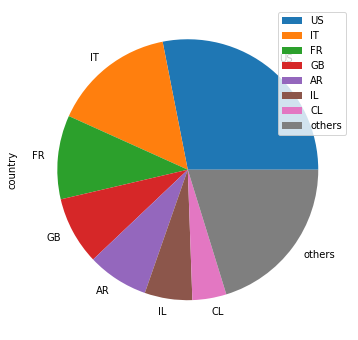

In [301]:
country_involved_relation(pay_df_1)

C:\Users\A947\AppData\Local\Temp\ipykernel_9804\2424751566.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big = big.append(new_row, ignore_index=False)


<AxesSubplot:ylabel='country'>

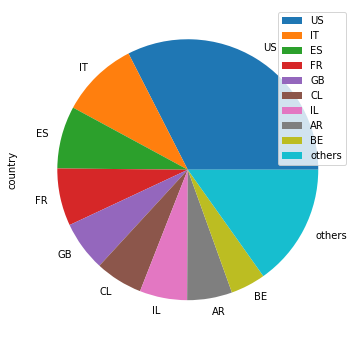

In [302]:
country_involved_relation(pay_df_2)

C:\Users\A947\AppData\Local\Temp\ipykernel_9804\2424751566.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big = big.append(new_row, ignore_index=False)


<AxesSubplot:ylabel='country'>

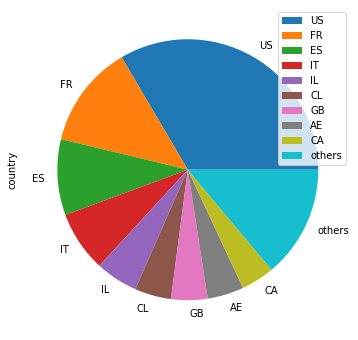

In [303]:
country_involved_relation(pay_df_test)

Тройка лидеров - США, Италия и Франция. Хоть Испания и стоит на третьем месте в одной из контрольных групп и в тестовой группе, но показывает нестабильность, оказавшись на девятом месте в первой контрольной выборке.

Посмотрим, повторяется ли данная картина для пользователей, покупающих премиум подписки.

In [304]:
#def prem_country_involved_relation(df, column='product_type', column2='prem'):
 #   pay_df_prem = df[df[column] == column2]
  #  return country_involved_relation(pay_df_prem)

def prem_country_involved_relation(df, column='country'):
    pay_df_prem = df[df['product_type'] == 'prem']
    values_frame = pay_df_prem[column].value_counts(normalize=True).to_frame()
    big = values_frame[values_frame['country'] > 0.04]['country'].to_frame()
    others = values_frame[values_frame['country'] < 0.04]['country'].sum()
    new_row = pd.Series(data={'country':others}, name='others')
    big = big.append(new_row, ignore_index=False)
    return big.plot(kind='pie', y='country', figsize=(6,6))

C:\Users\A947\AppData\Local\Temp\ipykernel_9804\3712755017.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big = big.append(new_row, ignore_index=False)


<AxesSubplot:ylabel='country'>

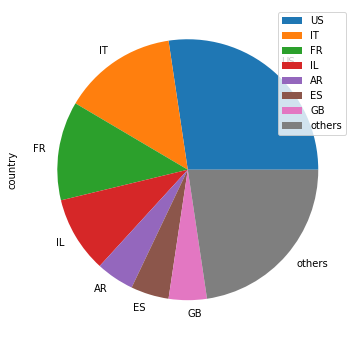

In [305]:
prem_country_involved_relation(pay_df_1)

C:\Users\A947\AppData\Local\Temp\ipykernel_9804\3712755017.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big = big.append(new_row, ignore_index=False)


<AxesSubplot:ylabel='country'>

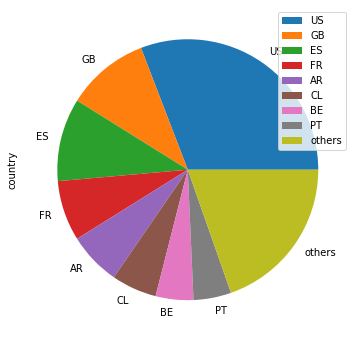

In [306]:
prem_country_involved_relation(pay_df_2)

C:\Users\A947\AppData\Local\Temp\ipykernel_9804\3712755017.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big = big.append(new_row, ignore_index=False)


<AxesSubplot:ylabel='country'>

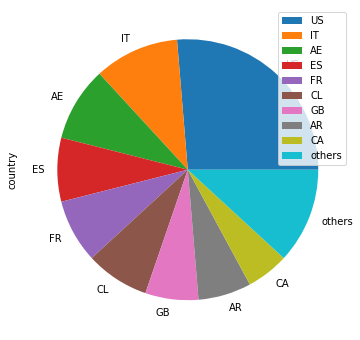

In [307]:
prem_country_involved_relation(pay_df_test)

За общим снижением интереса к премиум подписке по завышенной стоимости, в топ тестовой выборки поднялись Арабские Эмираты.

Мы могли наблюдать, что пользователи из этой страны не являлись самыми активными, находясь в середине общего списка платежей по странам, а также в середине списка платежей только по премиум подпискам. Тем не менее, после проведения теста, оказалось, что пользователи из этой страны оказались в топе заинтересованных пользователей, что позволяет сделать вывод о том, повышение стоимости подписки имеет смысл на пользователях из Арабских Эмиратов.

Это может быть связано с тем, что жители этой страны считаются людьми с одним из самых больших достатков на душу населения и не испытывают проблем с тем, что подписка стоит в два раза больше.

### Промежуточные результаты

Результаты показали, что премиум подписки приносят, в среднем, приблизительно третью часть всей выручки.

Можно увидеть, что на тестовой выборке количество пользователей, которые приобрели премиум подписку, меньше, чем на контрольных группах, что свидетельствует о том, что подавляющая масса пользователей менее заинтересована в такой покупке.

Тем не менее, если смотреть на цифры, а не процентные соотношения то видно, что премиум подписки в тестовой группе принесли примерно равное контрольным группам количество выручки, даже несмотря на то, что таких пользователей ощутимо меньше.

Было обнаружено, что пользователи из Арабских Эмиратов являются той группой, для которой введение двойной цены подписки будет целесообразным шагом.

Таким образом, если судить по таблицам с платежами, то нельзя с уверенностью сказать, что эксперимент оказался удачным, необходимо заглянуть глубже и понять, есть ли еще группы пользователей, для которых удваивание цены будет оправдано.

Следующим шагом соединим таблицы платежей и портретов пользователей, уберем ненужные столбцы и проведем финальный анализ, чтобы ответить на поставленные вопросы.

## 2. Осмотр, предобработка, исследование таблиц с портретами.

In [308]:
portrait_df_1.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892319115,25,435,NaN,US,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,US,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,AR,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [309]:
portrait_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4340 non-null   int64  
 1   age                      4340 non-null   int64  
 2   attraction_distribution  4340 non-null   int64  
 3   coins                    60 non-null     float64
 4   country                  4340 non-null   object 
 5   retention_days           3016 non-null   object 
 6   sex                      4340 non-null   int64  
 7   user_dating.age_start    4340 non-null   int64  
 8   user_dating.age_end      4340 non-null   int64  
 9   view_count               4340 non-null   int64  
 10  was_special              436 non-null    float64
 11  is_special               192 non-null    float64
 12  total_revenue            4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [310]:
portrait_df_1.duplicated().sum()

0

In [311]:
portrait_df_2.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892035504,37,137,NaN,IL,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,IT,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,FR,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,FR,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,US,1,1,35,53,94,NaN,NaN,0


In [312]:
portrait_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4264 non-null   int64  
 1   age                      4264 non-null   int64  
 2   attraction_distribution  4264 non-null   int64  
 3   coins                    61 non-null     float64
 4   country                  4264 non-null   object 
 5   retention_days           2900 non-null   object 
 6   sex                      4264 non-null   int64  
 7   user_dating.age_start    4264 non-null   int64  
 8   user_dating.age_end      4264 non-null   int64  
 9   view_count               4264 non-null   int64  
 10  was_special              411 non-null    float64
 11  is_special               191 non-null    float64
 12  total_revenue            4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [313]:
portrait_df_2.duplicated().sum()

0

In [314]:
portrait_df_test.head()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892309896,27,685,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,DE,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,FR,NaN,1,24,30,1,1.0,NaN,0


In [315]:
portrait_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4308 non-null   int64  
 1   age                      4308 non-null   int64  
 2   attraction_distribution  4308 non-null   int64  
 3   coins                    49 non-null     float64
 4   country                  4308 non-null   object 
 5   retention_days           2978 non-null   object 
 6   sex                      4308 non-null   int64  
 7   user_dating.age_start    4308 non-null   int64  
 8   user_dating.age_end      4308 non-null   int64  
 9   view_count               4308 non-null   int64  
 10  was_special              408 non-null    float64
 11  is_special               157 non-null    float64
 12  total_revenue            4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [316]:
portrait_df_test.duplicated().sum()

0

Просмотрев информацию о таблицах, увидели, что что нет дублированных значений.

В таблицах с портретами пользователей пропуски обозначают false, 0 или отсутствие заходов в приложение на
следующие дни для поля retention_days, как следует из предоставленных данных. Соответственно, заменим NaN во всех столбцах, где есть пропуски, нулями.

Изменим тип столбцов `coins`, `was_special`, `is_special` на `int64`.

In [317]:
portrait_df_1 = portrait_df_1.fillna(0)
portrait_df_1.isna().sum()

user_id                    0
age                        0
attraction_distribution    0
coins                      0
country                    0
retention_days             0
sex                        0
user_dating.age_start      0
user_dating.age_end        0
view_count                 0
was_special                0
is_special                 0
total_revenue              0
dtype: int64

In [318]:
portrait_df_2 = portrait_df_2.fillna(0)
portrait_df_2.isna().sum()

user_id                    0
age                        0
attraction_distribution    0
coins                      0
country                    0
retention_days             0
sex                        0
user_dating.age_start      0
user_dating.age_end        0
view_count                 0
was_special                0
is_special                 0
total_revenue              0
dtype: int64

In [319]:
portrait_df_test = portrait_df_test.fillna(0)
portrait_df_test.isna().sum()

user_id                    0
age                        0
attraction_distribution    0
coins                      0
country                    0
retention_days             0
sex                        0
user_dating.age_start      0
user_dating.age_end        0
view_count                 0
was_special                0
is_special                 0
total_revenue              0
dtype: int64

Пропуски заменены, теперь превратим `float` в `int`

In [320]:
def type_change(df):
    df['coins'] = df['coins'].astype('int64')
    df['was_special'] = df['was_special'].astype('int64')
    df['is_special'] = df['is_special'].astype('int64')
    return df.info()

In [321]:
type_change(portrait_df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  4340 non-null   int64 
 1   age                      4340 non-null   int64 
 2   attraction_distribution  4340 non-null   int64 
 3   coins                    4340 non-null   int64 
 4   country                  4340 non-null   object
 5   retention_days           4340 non-null   object
 6   sex                      4340 non-null   int64 
 7   user_dating.age_start    4340 non-null   int64 
 8   user_dating.age_end      4340 non-null   int64 
 9   view_count               4340 non-null   int64 
 10  was_special              4340 non-null   int64 
 11  is_special               4340 non-null   int64 
 12  total_revenue            4340 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 440.9+ KB


In [322]:
type_change(portrait_df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  4264 non-null   int64 
 1   age                      4264 non-null   int64 
 2   attraction_distribution  4264 non-null   int64 
 3   coins                    4264 non-null   int64 
 4   country                  4264 non-null   object
 5   retention_days           4264 non-null   object
 6   sex                      4264 non-null   int64 
 7   user_dating.age_start    4264 non-null   int64 
 8   user_dating.age_end      4264 non-null   int64 
 9   view_count               4264 non-null   int64 
 10  was_special              4264 non-null   int64 
 11  is_special               4264 non-null   int64 
 12  total_revenue            4264 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 433.2+ KB


In [323]:
type_change(portrait_df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  4308 non-null   int64 
 1   age                      4308 non-null   int64 
 2   attraction_distribution  4308 non-null   int64 
 3   coins                    4308 non-null   int64 
 4   country                  4308 non-null   object
 5   retention_days           4308 non-null   object
 6   sex                      4308 non-null   int64 
 7   user_dating.age_start    4308 non-null   int64 
 8   user_dating.age_end      4308 non-null   int64 
 9   view_count               4308 non-null   int64 
 10  was_special              4308 non-null   int64 
 11  is_special               4308 non-null   int64 
 12  total_revenue            4308 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 437.7+ KB


Пропуски заменены, типы данных заменены, можно приступать к анализу.

In [324]:
portrait_df_1.head(10)

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892319115,25,435,0,US,"1,2,3,4,5,6",0,22,32,982,0,0,0
1,891248523,29,500,0,US,"1,2",1,26,32,12,0,0,0
2,891670932,33,800,0,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0,0,0
3,891060786,26,0,0,AR,"1,2,3,4,5",1,23,29,0,0,0,0
4,892006554,35,294,0,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0,0,0
5,891497961,28,400,28,CL,"1,2",1,25,31,25,0,0,6396
6,892154826,20,100,0,US,"1,2,3,4,5,7,8,9,11,12,13,14,15,17,18,19,20,21,...",1,17,23,10,0,0,0
7,891710454,25,545,0,IT,"2,4,6,8,9,11,12,14,15,16,17",1,18,39,11,0,0,0
8,891229611,38,0,0,CL,"1,2,3",1,35,41,2,0,0,0
9,892046007,49,0,0,US,0,1,46,52,0,0,0,0


Задача состоит в том, чтобы понять, для каких групп людей эксперимент по введению двойной стоимости подписки оказался удачным.

Проверим несколько групп людей по некоторым основным признакам, а именно по полу и возрасту. При необходимости рассмотрим некоторые дополнительные признаки.

Для начала соединим таблицы по столбцу `user_id`, чтобы иметь полную картину портрета пользователя с его платежами.

In [325]:
full_df_1 = portrait_df_1.merge(pay_df_1, how='outer')
full_df_1.tail()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
4498,892022304,26,227,0,US,0,0,23,29,427,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4499,891905022,38,200,0,AR,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4500,891304722,49,411,0,US,1,1,46,52,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4501,891302328,27,0,0,US,"1,3,5",1,24,30,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4502,891182532,31,1000,0,US,1,1,19,34,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


В столбцах, которые присоединились к таблице с портретами, наблюдаются пропуски. Это произошло потому, что у нас нет данных о покупках этих пользователей, то есть покупок они не совершали. Оставим эти пропуски.

In [326]:
full_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4502
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4503 non-null   int64  
 1   age                      4503 non-null   int64  
 2   attraction_distribution  4503 non-null   int64  
 3   coins                    4503 non-null   int64  
 4   country                  4503 non-null   object 
 5   retention_days           4503 non-null   object 
 6   sex                      4503 non-null   int64  
 7   user_dating.age_start    4503 non-null   int64  
 8   user_dating.age_end      4503 non-null   int64  
 9   view_count               4503 non-null   int64  
 10  was_special              4503 non-null   int64  
 11  is_special               4503 non-null   int64  
 12  total_revenue            4503 non-null   int64  
 13  registration_date        356 non-null    object 
 14  payment_date            

In [327]:
full_df_2 = portrait_df_2.merge(pay_df_2, how='outer')
full_df_2.tail()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
4395,891937401,63,242,0,IT,"1,2",1,50,66,33,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4396,891692844,35,500,0,FR,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4397,891096429,41,333,0,US,0,1,38,44,6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4398,891697584,48,210,0,GB,"2,3,5,7,9,10,12,14,15",1,45,51,19,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4399,891095634,22,0,0,IT,0,1,19,25,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
full_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4400 entries, 0 to 4399
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4400 non-null   int64  
 1   age                      4400 non-null   int64  
 2   attraction_distribution  4400 non-null   int64  
 3   coins                    4400 non-null   int64  
 4   country                  4400 non-null   object 
 5   retention_days           4400 non-null   object 
 6   sex                      4400 non-null   int64  
 7   user_dating.age_start    4400 non-null   int64  
 8   user_dating.age_end      4400 non-null   int64  
 9   view_count               4400 non-null   int64  
 10  was_special              4400 non-null   int64  
 11  is_special               4400 non-null   int64  
 12  total_revenue            4400 non-null   int64  
 13  registration_date        323 non-null    object 
 14  payment_date            

In [329]:
full_df_test = portrait_df_test.merge(pay_df_test, how='outer')
full_df_test.tail()

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
4423,891078639,17,895,0,US,"1,2,3,4,5",1,16,20,96,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4424,891188733,27,866,0,US,"1,2,3",1,18,41,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4425,891293718,48,0,0,AR,0,1,47,51,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4426,891192357,32,0,0,AU,0,1,16,49,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4427,891668910,35,575,0,AE,1,1,16,99,73,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
full_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 0 to 4427
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4428 non-null   int64  
 1   age                      4428 non-null   int64  
 2   attraction_distribution  4428 non-null   int64  
 3   coins                    4428 non-null   int64  
 4   country                  4428 non-null   object 
 5   retention_days           4428 non-null   object 
 6   sex                      4428 non-null   int64  
 7   user_dating.age_start    4428 non-null   int64  
 8   user_dating.age_end      4428 non-null   int64  
 9   view_count               4428 non-null   int64  
 10  was_special              4428 non-null   int64  
 11  is_special               4428 non-null   int64  
 12  total_revenue            4428 non-null   int64  
 13  registration_date        266 non-null    object 
 14  payment_date            

В обновленных таблицах значения столбцов `revenue` и `payment_service_id` тип данных изменился из-за появления пустых данных. Вернем колонке `revenue` тип данных `int64`, заменив перед этим пустые значения нулем.

In [331]:
full_df_1['revenue'] = full_df_1['revenue'].fillna(0)
full_df_1['revenue'] = full_df_1['revenue'].astype('int64')
full_df_1['revenue'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4503 entries, 0 to 4502
Series name: revenue
Non-Null Count  Dtype
--------------  -----
4503 non-null   int64
dtypes: int64(1)
memory usage: 70.4 KB


In [332]:
full_df_2['revenue'] = full_df_2['revenue'].fillna(0)
full_df_2['revenue'] = full_df_2['revenue'].astype('int64')
full_df_2['revenue'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4400 entries, 0 to 4399
Series name: revenue
Non-Null Count  Dtype
--------------  -----
4400 non-null   int64
dtypes: int64(1)
memory usage: 68.8 KB


In [333]:
full_df_test['revenue'] = full_df_test['revenue'].fillna(0)
full_df_test['revenue'] = full_df_test['revenue'].astype('int64')
full_df_test['revenue'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4428 entries, 0 to 4427
Series name: revenue
Non-Null Count  Dtype
--------------  -----
4428 non-null   int64
dtypes: int64(1)
memory usage: 69.2 KB


Присоединив таблицу платежей к таблице портретов, мы можем наблюдать, что пользователей, произведших оплату сильно меньше, чем всего пользователей. Проведем анализ, чтобы выяснить, какие люди пользуются приложением, после чего посмотрим, 

In [334]:
def user_statistics(df):
    sex_relation_men = df[df['sex'] == 1].shape[0] / df.shape[0]
    sex_relation_women = df[df['sex'] == 0].shape[0] / df.shape[0]
    mean_age = df['age'].mean()
    age_min = df['age'].min()
    age_max = df['age'].max()
    prem =  df[df['product_type'] == 'prem']
    prem_rel_men = prem[prem['sex'] == 1].shape[0] / prem.shape[0]
    prem_rel_women = prem[prem['sex'] == 0].shape[0] / prem.shape[0]
    prem_number_men = prem[prem['sex'] == 1].shape[0]
    prem_number_women = prem[prem['sex'] == 0].shape[0]
    
    print(f'В таблице {sex_relation_men:.0%} мужчин и {sex_relation_women:.0%} женщин\n'
          f'Cредний возраст пользователя - {mean_age:.0f} года/лет\nMинимальный - {age_min}\n'
          f'Mаксимальный - {age_max}\nМужчин, купивших премиум подписку - {prem_rel_men:.0%}, {prem_number_men:.0f} человек(-а)\n'
          f'Женщин, купивших премиум подписку - {prem_rel_women:.0%}, {prem_number_women:.0f} человек(-а)')

In [335]:
user_statistics(full_df_1)

В таблице 96% мужчин и 4% женщин
Cредний возраст пользователя - 32 года/лет
Mинимальный - 16
Mаксимальный - 99
Мужчин, купивших премиум подписку - 100%, 106 человек(-а)
Женщин, купивших премиум подписку - 0%, 0 человек(-а)


In [336]:
user_statistics(full_df_2)

В таблице 96% мужчин и 4% женщин
Cредний возраст пользователя - 32 года/лет
Mинимальный - 16
Mаксимальный - 99
Мужчин, купивших премиум подписку - 95%, 102 человек(-а)
Женщин, купивших премиум подписку - 5%, 5 человек(-а)


In [337]:
full_df_2.query('sex == 0 and product_type == "prem"')

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
157,891291573,37,382,0,US,"1,2,3",0,34,40,471,1,1,6292,06.11.2017 4:33,09.11.2017 5:55,6292,147.0,LeftMenu,prem
244,892032072,26,0,0,GB,"1,2,3",0,16,99,16157,1,0,3588,22.10.2017 14:21,23.10.2017 15:37,3588,68.0,none,prem
1783,892333464,34,316,0,US,1,0,31,37,698,1,1,4537,16.10.2017 1:51,16.10.2017 1:57,4537,147.0,none,prem
4039,891170697,35,664,0,GB,"1,2",0,30,71,542,1,1,4693,08.11.2017 9:55,08.11.2017 10:30,4693,147.0,LeftMenu,prem
4283,891826944,36,43,0,DE,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",0,27,33,1317,1,1,6292,26.10.2017 20:47,31.10.2017 22:51,6292,147.0,PopularUserBlockDialog,prem


In [338]:
user_statistics(full_df_test)

В таблице 95% мужчин и 5% женщин
Cредний возраст пользователя - 32 года/лет
Mинимальный - 16
Mаксимальный - 99
Мужчин, купивших премиум подписку - 100%, 76 человек(-а)
Женщин, купивших премиум подписку - 0%, 0 человек(-а)


Как мы видим, подавляющее большинство покупателей премиум подписки - мужчины.

Тем не менее, во второй контрольной группе 5% покупателей премиума - это женщины. Таким образом, женщины тоже, хоть и редко, покупают подписку, это значит, что для них не следует вводить стоимость, увеличенную в два раза, чтобы не терять потенциальную группу покупателей премиума.

In [339]:
full_df_1['age'].sort_values().unique()

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 71, 72,
       73, 75, 91, 98, 99], dtype=int64)

Пользователи в таблице практически всех возрастов. Посмотрим на пользователей старше 70 лет и определимся, выброс ли это.

In [340]:
full_df_70 = full_df_1.query('age > 70')
full_df_70

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
69,891520800,71,425,0,IT,"1,2",1,50,70,47,0,0,0,NaN,NaN,0,NaN,NaN,NaN
790,891746646,99,300,0,IT,0,1,50,70,10,0,0,0,NaN,NaN,0,NaN,NaN,NaN
1520,891918399,99,62,0,IT,"1,2,3",1,50,99,16,0,0,0,NaN,NaN,0,NaN,NaN,NaN
1933,891374112,99,900,0,AE,"1,2,3,4,5,6,7,8,9,10,11",1,16,99,462,0,0,0,NaN,NaN,0,NaN,NaN,NaN
2199,892185039,99,759,0,GB,"1,2,3,4,5,6,7,8,9",1,43,49,79,1,1,7332,19.10.2017 7:36,19.10.2017 7:52,7332,147.0,Dating,prem
2336,892321845,99,500,0,US,0,1,22,99,4,0,0,0,NaN,NaN,0,NaN,NaN,NaN
2412,891682545,99,0,0,US,0,1,96,102,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN
2517,891836703,75,0,0,IT,1,1,16,99,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN
2576,892330656,71,340,0,IT,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,33,98,250,0,0,0,NaN,NaN,0,NaN,NaN,NaN
2951,891900387,99,333,0,IT,"1,3,4",1,16,99,3,0,0,0,NaN,NaN,0,NaN,NaN,NaN


In [341]:
full_df_70['age'].value_counts()

99    7
71    2
75    1
98    1
72    1
91    1
73    1
Name: age, dtype: int64

In [342]:
full_df_70['user_id'].nunique()

14

Действительно может быть, что пожилой человек пользуется приложением, но 7 человек в возрасте 99 лет и в реальной жизни найти сложно, а в приложении тем более. 

Впрочем, мы не можем наверняка знать, действительно ли в данных ошибка или пользователи указали другой возраст, поэтому оставим все как есть, ибо данные об этих пользователях немногочисленные и на выборку сильно не влияют.

Тем не менее, есть один человек в возрасте 99 лет, который оплатил премиум подписку.

In [343]:
full_df_70.query('is_special == 1')

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
2199,892185039,99,759,0,GB,"1,2,3,4,5,6,7,8,9",1,43,49,79,1,1,7332,19.10.2017 7:36,19.10.2017 7:52,7332,147.0,Dating,prem


Но и с ним не все так гладко. Появляется много вопросов, например - почему возраст человека - 99, а ищет он людей в возрасте 43 - 49 лет? Может ли быть такое, что он ошибся и на самом деле ему, например, 49 лет, или специально указал неправильный возраст?

Также сомнение вызывает тот факт, что премиум подписку этот пользователь купил через 16 минут после регистрации в приложении. Возникает вопрос, не могло ли это быть случайной покупкой? Или же пользователь зарегестрировал новый аккаунт, зная преимущества премиум плодписки и решил купить ее сразу же для открытия некоторых полезных функций? 

Так же оставим без внимания.

Посмотрим, как распределяется данные по возрасту для всех пользователей и для пользователей, купивших премиум подписку.

**Все пользователи контрольной таблицы 1**

<AxesSubplot:>

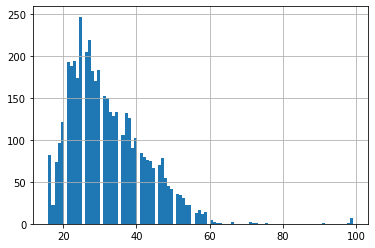

In [344]:
full_df_1['age'].hist(bins=100)

**Пользователи таблицы 1, купившие премиум**

<AxesSubplot:>

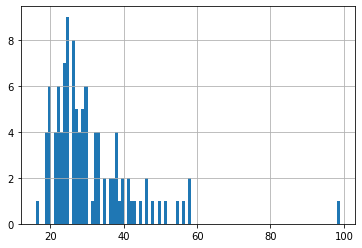

In [345]:
full_df_1_prem = full_df_1[full_df_1['product_type'] == 'prem']
full_df_1_prem['age'].hist(bins=100)

По графикам видно, что распределения похожи, чем старше люди - тем меньше пользуются приложением. 

Что касается покупки премиум подписок, то распределение практически идентично. 

**Все пользователи контрольной таблицы 2**

<AxesSubplot:>

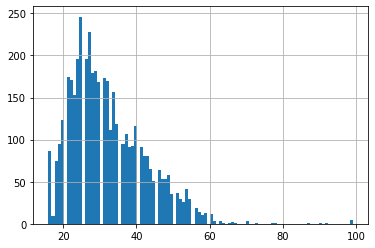

In [346]:
full_df_2['age'].hist(bins=100)

**Пользователи таблицы 2, купившие премиум**

<AxesSubplot:>

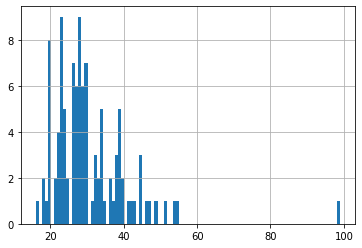

In [347]:
full_df_2_prem = full_df_2[full_df_2['product_type'] == 'prem']
full_df_2_prem['age'].hist(bins=100)

Для второй контрольной группы результат идентичен.

**Все пользователи тестовой таблицы**

<AxesSubplot:>

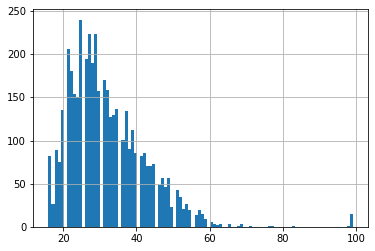

In [348]:
full_df_test['age'].hist(bins=100)

**Пользователи тестовой группы, купившие премиум**

<AxesSubplot:>

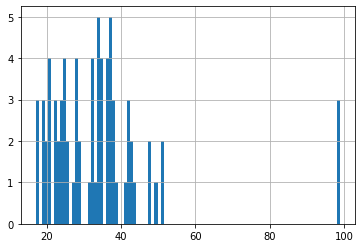

In [349]:
full_df_test_prem = full_df_test[full_df_test['product_type'] == 'prem']
full_df_test_prem['age'].hist(bins=100)

Изучив гистограммы, мы увидим, что гистограмма покупок премиум подписки в тестовой группе, где стоимость увеличена в два раза, отличается от гистограмм групп со стандартной ценой.

Если в контрольных группах гистограммы покупок премиум подписки по возрасту повторяют гистограммы возраста пользователей приложения, то есть основная масса пользователей и покупателей премиум подписки - это люди в возрасте 20 - 30 лет, то в тестовой группе, где распределение пользователей по возрастам повторяет контрольные группы, гистограмма покупок премиум подписки показала, что охотнее подписку по удвоенной цене покупает группа людей в возрасте 30 - 40 лет.

Это можно объяснить тем, что люди в этом возрасте, в основном, более состоявшиеся в жизни, нежели молодежь и могут потратить те деньги, за которые продается премиум подписка охотнее, несмотря на увеличенную цену, что означает, что ввести двойную стоимость подписки для данной группы пользователей может оказаться целесообразным решением.

In [350]:
full_df_test_prem.query('age == 99')

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,registration_date,payment_date,revenue,payment_service_id,place,product_type
2726,892065108,99,475,72,FR,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,2...",1,16,41,187,1,1,47242,21.10.2017 20:40,08.11.2017 22:45,7098,147.0,PopularUserChatBlock,prem
2733,892065108,99,475,72,FR,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,2...",1,16,41,187,1,1,47242,21.10.2017 20:40,09.11.2017 10:45,7098,147.0,PopularUserChatBlock,prem
2734,892065108,99,475,72,FR,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,2...",1,16,41,187,1,1,47242,21.10.2017 20:40,10.11.2017 15:24,7111,147.0,PopularUserChatBlock,prem


В тестовой группе так же есть пользователи  с сомнительным возрастом 99 лет, один из них купил подписку три раза. Скорее всего, это ошибочный возраст, тем не менее, знать настоящий возраст мы не можем, хоть и можно предположить, что, если пользователь ищет людей в возрасте от 16 до 41 года, то, судя по верхней границе, возраст может составлять, например, 39 лет.

Но так же можно и предположить, что это действительно пожилой человек, который, например, ищет себе сиделку или просто молодого человека для общения.

Таким образом, заменять возраст мы не будем, так как данные о пользователе не сильно влияют на данные по всей таблице. Но и удалять пользователей с таким возрастом смысла нет, ибо, кроме премиум подписки, пользователь мог приносить прибыль, покупая монеты и другие продукты.

Прежде чем подводить итоги, посчитаем, оличается ли, и, если отличается, то насколько сильно, отношение прибыли от премиум подписок к общей прибыли. Прибыль от пользователя только по покупкам премиум подписки у нас посчитана в глобальной переменной `prem_revenue`, но, так как кто-то мог купить ее больше одного раза (продлить), как пользователь, о котором шла речь выше, уберем повторяющиеся идентификаторы пользователей, чтобы посчитать общую прибыль всех пользователей по всем продуктам и посчитаем отношение.

In [351]:
def revenue_statistic(df):
    df_updated = df.drop_duplicates(subset='user_id', ignore_index=True)
    total_revenue = df_updated['revenue'].sum()
    prem_revenue = df[df['product_type'] == 'prem']['revenue'].sum()
    prem_to_all_revenue_relation = prem_revenue / total_revenue
    return f'Отношение прибыли от покупки премиум подписки ко всей прибыли составляет {prem_to_all_revenue_relation:.1%}'

In [352]:
revenue_statistic(full_df_1)

'Отношение прибыли от покупки премиум подписки ко всей прибыли составляет 54.6%'

In [353]:
revenue_statistic(full_df_2)

'Отношение прибыли от покупки премиум подписки ко всей прибыли составляет 55.8%'

In [354]:
revenue_statistic(full_df_test)

'Отношение прибыли от покупки премиум подписки ко всей прибыли составляет 56.7%'

Как показали результаты рассчетов, в контрольных группах покупки премиум подписки составляют чуть более половины всей прибыли. В тестовой группе результат оказался таким же.

### Промежуточные результаты

Соединив таблицы и исследовав некоторые группы пользователей, в частности по полу и возрасту, мы пришли к некоторым немаловажным выводам о целесообразности повышения цены премиум подписки.  

## 3. Результаты исследования и общий вывод.

Изучив результаты проведенного A/B теста, было обнаружено, что тест не подтвердил преимущетва новых цен для всех пользователей.

Тем не менее, есть группы пользователей для которых имеет смысл повысить стоимость подписки. Оказалось, что пользователи из Арабских Эмиратов и мужчины в возрасте 30 - 40 лет готовы покупать премиум подписку, несмотря на увеличенную в два раза стоимость.

Таким образом, целесообразно провести еще один A/B тест, в котором стоимость подписки увеличат для этих групп пользователей и посмотреть на результат.